# LINERA REGRESSION FROM SCRATCH

# Linear Regression 
     Linear Regression is a supervised learning algorithm which is both a statistical and a machine learning algorithm.It is used to predict the real-valued output y based on the given input value x. It depicts the relationship between the      dependent variable y and the independent variables x.The model function for linear regression, which is a function that maps from x to y is represented as:

 #### y=wx+b 
    
 ###### here, b is the bias.
 ######  x represents the feature vector
 ###### w represents the weight vector.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import LabelEncoder

# LET US CODE ALGORITHM FROM SCRATCH

In [2]:
class LinearRegression:
   
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    def fit(self, X, y):
        
        
        # 1. Initialize weights and bias to zeros
                
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        
        
        # 2. Perform gradient descent
       
    
        for i in range(self.n_iterations):
           
        
            # Line equation
            
            y_hat = np.dot(X, self.weights) + self.bias
          
            
            # Calculate derivatives
          
            
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            
            
            # Update the coefficients
            
            
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
    
        return np.dot(X, self.weights) + self.bias

# Loading data

In [3]:
data=pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine learning/projects/CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Cleaning

In [5]:
data.shape   # to show the no of rows and columns

(4340, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Check for null values

In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Check for duplicates

In [8]:
data.duplicated().sum()

763

### Drop duplicate rows

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(3577, 8)

# Data visualization

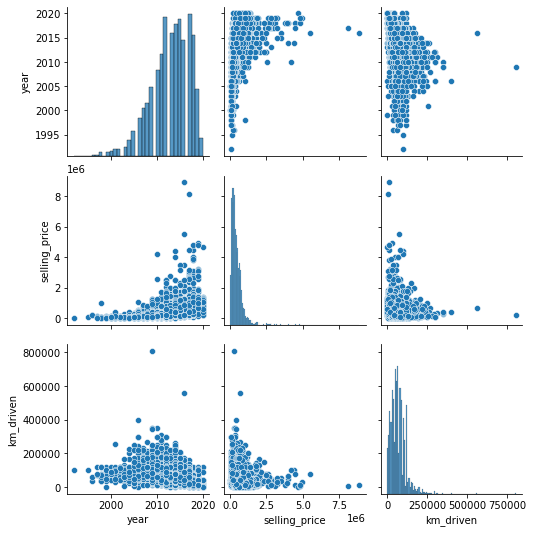

In [11]:
sns.pairplot(data)

### check for skewness

In [12]:
data.skew()

C:\Users\gokul\AppData\Local\Temp\ipykernel_1376\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


year            -0.786122
selling_price    5.453918
km_driven        2.548522
dtype: float64

### Removing skewness by interquantile method

In [13]:
q1=data['selling_price'].quantile(0.25)
q2=data['selling_price'].quantile(0.75)

In [14]:
q1

200000.0

In [15]:
q2

600000.0

In [16]:
data['selling_price']=np.where(data['selling_price']<q1,q1,data['selling_price'])
data['selling_price']=np.where(data['selling_price']>q2,q2,data['selling_price'])

In [17]:
q1=data['km_driven'].quantile(0.25)
q2=data['km_driven'].quantile(0.75)

In [18]:
q1

36000.0

In [19]:
q2

90000.0

In [20]:
data['km_driven']=np.where(data['km_driven']<q1,q1,data['km_driven'])
data['km_driven']=np.where(data['km_driven']>q2,q2,data['km_driven'])

In [21]:
data.skew()

C:\Users\gokul\AppData\Local\Temp\ipykernel_1376\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


year            -0.786122
selling_price    0.220064
km_driven        0.001910
dtype: float64

# EDA PROCESS

In [22]:
numeric=['year','selling_price','km_driven']
categorical=['fuel','seller_type','transmission','owner']

## univariant analysis

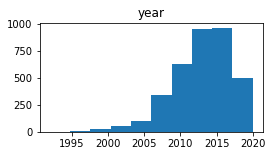

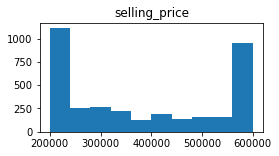

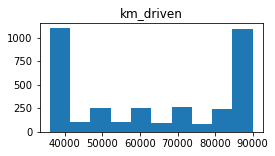

In [23]:
for i in numeric:
    plt.figure(figsize=(4,2))
    plt.hist(i,data=data)
    plt.title(i)  # univariant analysis for numeric data type columns

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\si

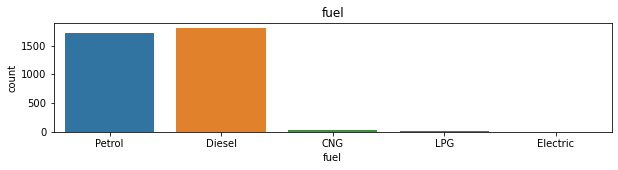

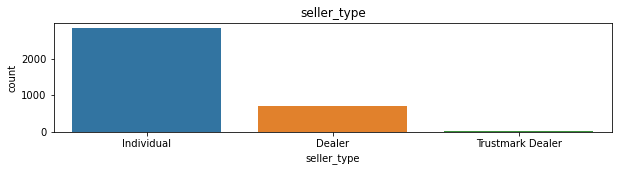

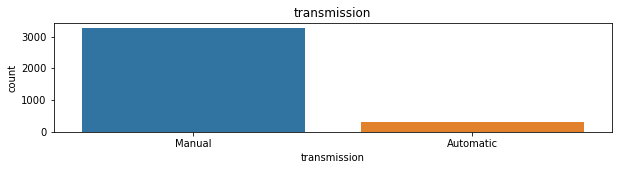

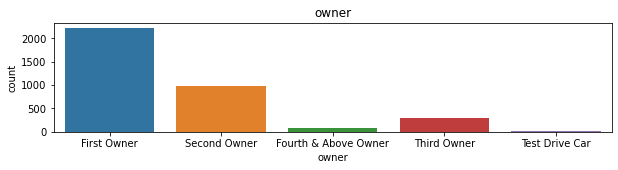

In [24]:
for i in categorical:
    plt.figure(figsize=(10,2))
    sns.countplot(i,data=data)
    plt.title(i)                  # univariant analysis for categorical columns

## Bivariant analysis

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gokul\anacond

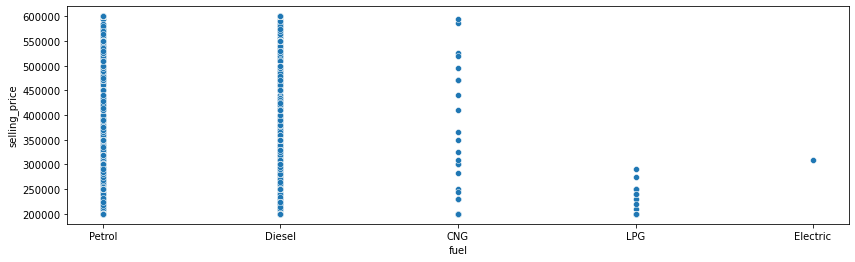

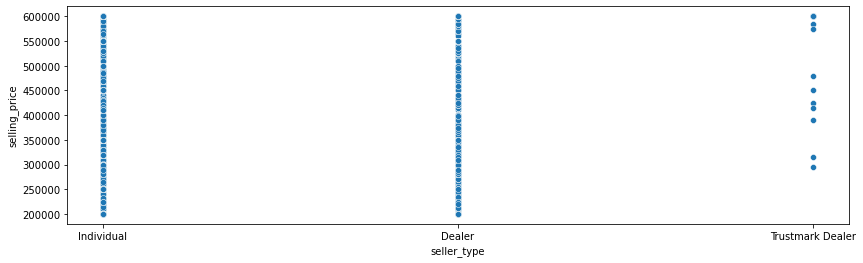

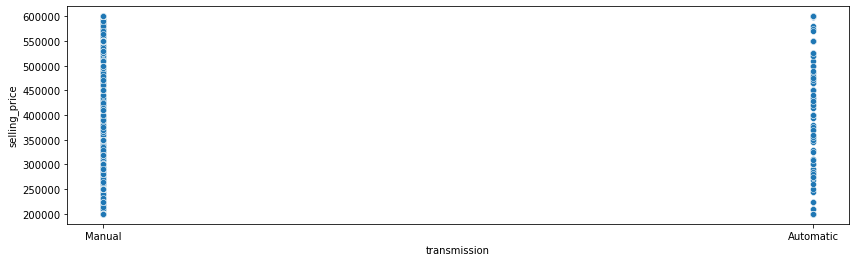

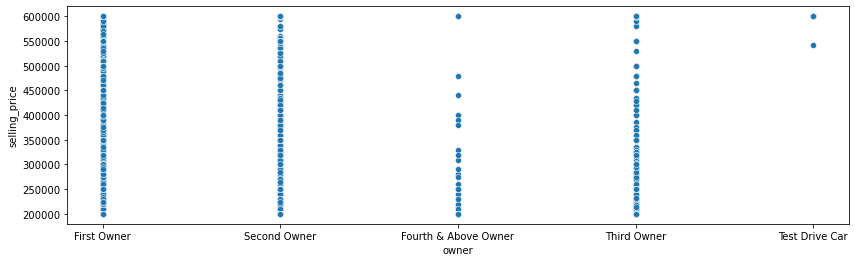

In [25]:
for i in categorical:               # bivariant analysis for categorical columns Vs target column 
    plt.figure(figsize=(14,4))      
    sns.scatterplot(data[i],data['selling_price'],data=data)

## Multivarant analysis

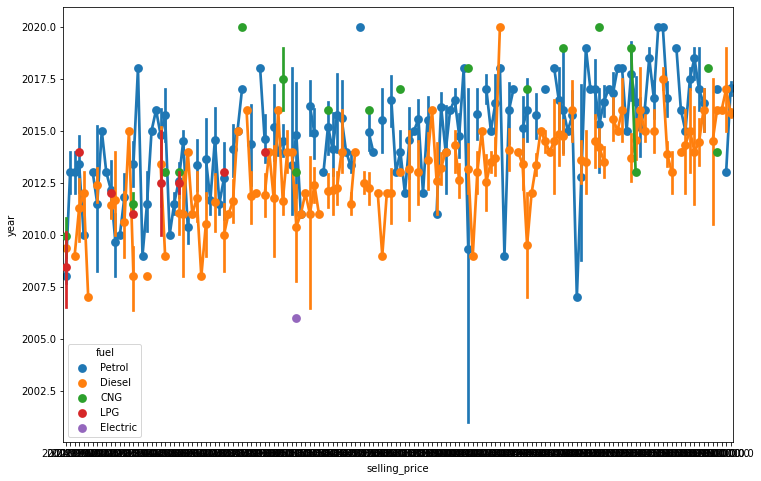

In [26]:
plt.figure(figsize=(12,8))
sns.pointplot(x='selling_price',y='year',hue="fuel",data=data)
plt.show()

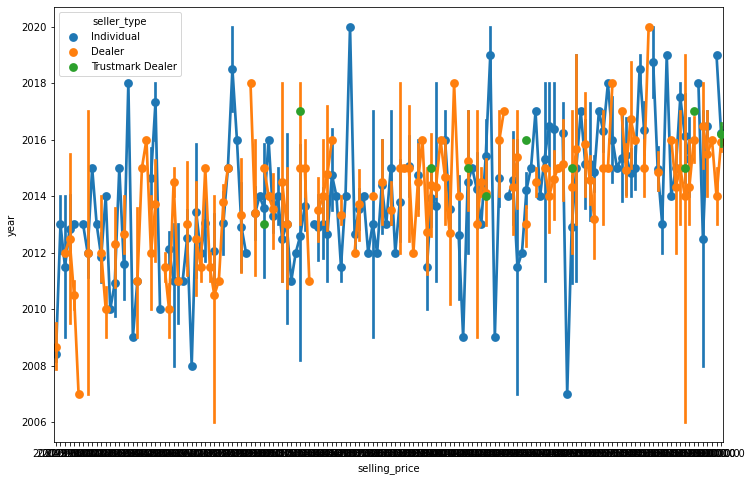

In [27]:
plt.figure(figsize=(12,8))
sns.pointplot(x='selling_price',y='year',hue="seller_type",data=data)
plt.show()

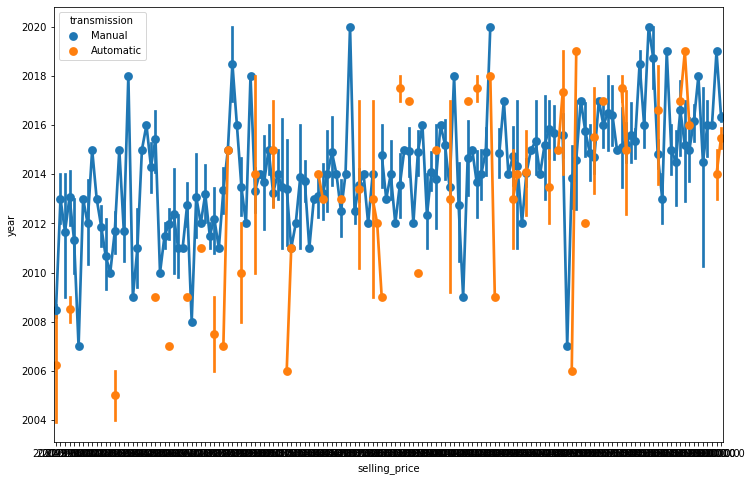

In [28]:
plt.figure(figsize=(12,8))
sns.pointplot(x='selling_price',y='year',hue="transmission",data=data)
plt.show()

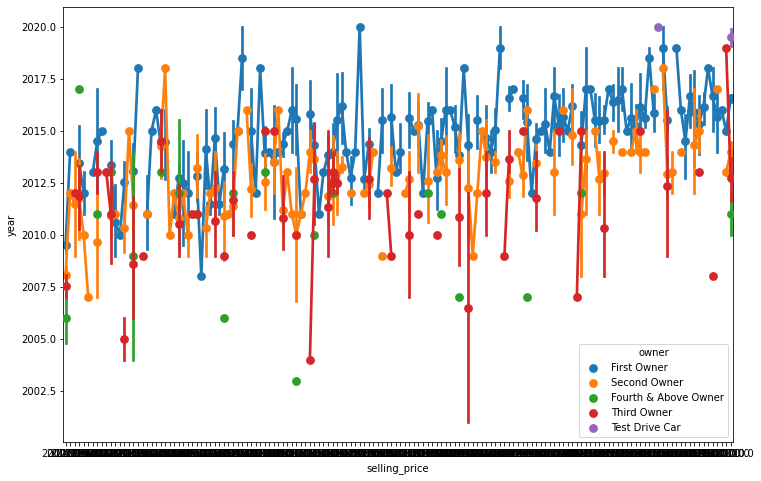

In [29]:
plt.figure(figsize=(12,8))
sns.pointplot(x='selling_price',y='year',hue="owner",data=data)
plt.show()

# Feature scaling process

In [30]:
lab=LabelEncoder()     #coverting categorical values into numeric values
data[['name','fuel','seller_type','transmission','owner']]=data[['name','fuel','seller_type','transmission','owner']].apply(lab.fit_transform)

In [31]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,200000.0,70000.0,4,1,1,0
1,1041,2007,200000.0,50000.0,4,1,1,0
2,505,2012,600000.0,90000.0,1,1,1,0
3,118,2017,250000.0,46000.0,4,1,1,0
4,279,2014,450000.0,90000.0,1,1,1,2


### Dividing dataset into x and y

In [32]:
x=data.drop('selling_price',axis=1)
y=data['selling_price']

# Spliting data into train and test data set

In [33]:
# spliting the data into train and test data set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Train the model and prediction

In [34]:
model = LinearRegression(0.00000000005,10000)     # calling the model by passing learning rate and number of iterations
model.fit(X_train, y_train)             # train the model by passing the X_train and y_train values
preds = model.predict(X_test)           # predicting the values by valuing the X_test

### predicted values

In [35]:
preds.astype('int64')    # predicted values 

array([290383, 316303, 292412, 416934, 363090, 312336, 400447, 294473,
       274168, 383060, 277834, 286380, 415465, 394047, 426960, 300644,
       411949, 422932, 394138, 297756, 330008, 297309, 331845, 399072,
       303455, 415520, 338701, 399647, 301412, 322750, 356054, 428051,
       427319, 352659, 278599, 293006, 403750, 416528, 385232, 316469,
       409464, 426400, 331772, 359012, 424076, 288359, 309975, 295484,
       287103, 417532, 268354, 343324, 292966, 290472, 293835, 274129,
       334999, 268937, 268729, 412038, 425925, 321672, 391525, 420891,
       288567, 403653, 342773, 333116, 399130, 284341, 358809, 394261,
       309085, 270719, 288123, 423585, 378945, 422532, 411558, 267313,
       383509, 394203, 375136, 319586, 285954, 367683, 409582, 285812,
       373600, 403696, 420033, 348183, 290358, 394930, 338047, 302422,
       341387, 373697, 409997, 270655, 304749, 402609, 384928, 292896,
       396375, 277875, 277802, 279423, 417200, 410300, 352236, 269859,
      

# Accuracy

In [36]:
ssr=((preds - y_test.mean())**2).sum()  #Sum of square of regression

In [37]:
ssr

3340079373217.5205

In [38]:
sst=((y_test-y_test.mean())**2).sum()   #Sum of square of total

In [39]:
sst

18982769652026.906

In [40]:
r2=1-(ssr/sst)   #R_square value 

In [41]:
r2

0.824046783770519